In [4]:
import pandas as pd
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import sklearn

/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5, 0, 'first feature')

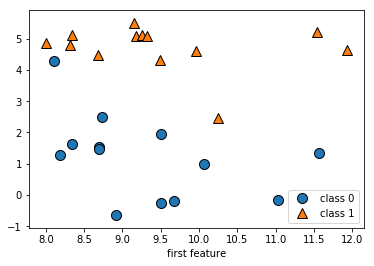

In [5]:
# make dataset
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0',"class 1"],loc = 4)
plt.xlabel("first feature")

In [8]:
print(X.shape)

(26, 2)


In [10]:
# 위스콘신 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() = \n{}".format(cancer.keys()))

cancer.keys() = 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
# data point 569, feature 30
print(cancer.data.shape)
print(cancer.feature_names)
print(len(cancer.feature_names))
print(len(cancer.data))

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30
569


In [15]:
print("Number of data according to the class: {}".format({
    n:v for n, v in zip(cancer.target_names,np.bincount(cancer.target))
}))

Number of data according to the class: {'malignant': 212, 'benign': 357}


In [17]:
# 보스턴 주택가격
from sklearn.datasets import load_boston
boston = load_boston()
print("data format : {}".format(boston.data.shape))

data format : (506, 13)


In [18]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape = {}".format(X.shape))

# 13개 기본 특성에 특성끼리 곱한 '상호작용'으로 의도적으로 확장한 데이터셋.
# 이런 식으로 특성을 유도하는 걸 feature engineering이라고 함.
# 13개 특성 + 13C2 78개 + 각 특성별 제곱값 13개 = 13 + 78 + 13 = 104

X.shape = (506, 104)


# KNN 적용하기

In [20]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge() # binary값으로 만든 가상의 데이터셋
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)

/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
print("test set prediction: {}".format(clf.predict(X_test)))

test set prediction: [1 0 1 0 1 0 0]


In [24]:
print("test set accuracy: {}".format(clf.score(X_test, y_test)))

test set accuracy: 0.8571428571428571


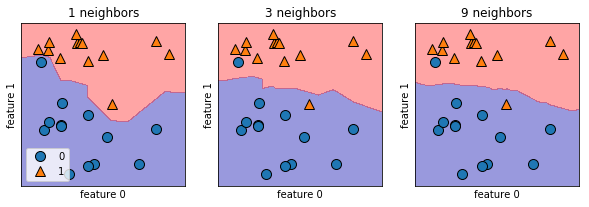

In [29]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax= ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

In [31]:
# cancer data KNN으로 처리해보기
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

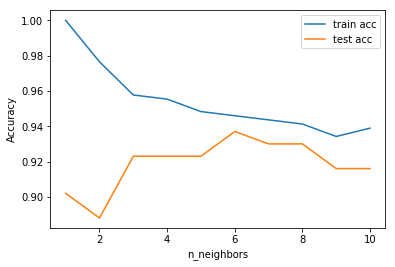

In [33]:
training_acc, test_acc = [], []
neighbors = range(1,11)
for n_neighbors in neighbors:
    # model creation
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    # train_acc saving
    training_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(neighbors, training_acc, label = "train acc")
plt.plot(neighbors, test_acc, label = "test acc")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

KNN의 경우 neighbors 수가 늘어날수록 정규화. neighbors가 10 넘어가면 오히려 예측이 낮아진다.

# Linear Regression (OLS) 

In [34]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [35]:
print("coefficient = coef_ : {}".format(lr.coef_))
print("intercept = intercept_ : {}".format(lr.intercept_))

coefficient = coef_ : [0.39390555]
intercept = intercept_ : -0.031804343026759746


In [37]:
print("train acc : {}".format(lr.score(X_train, y_train)))
print("test acc : {}".format(lr.score(X_test, y_test)))
# train과 test 둘 다 값이 크지 않다 = underfitting.
# score값이 R**2라고 하는 거 같은데..?

train acc : 0.6700890315075756
test acc : 0.65933685968637


In [38]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [40]:
print("train acc : {}".format(lr.score(X_train, y_train)))
print("test acc : {}".format(lr.score(X_test, y_test)))
# overfitting. 과적합 방지를 위한 regularization 필요함

train acc : 0.952051960903273
test acc : 0.6074721959665863


# L2 Regularization.


In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("train acc : {}".format(ridge.score(X_train, y_train)))
print("test acc : {}".format(ridge.score(X_test, y_test)))

train acc : 0.8857966585170939
test acc : 0.7527683481744756


In [48]:
# regularization parameter인 lambda 값의 디폴트는 1.0이다.
# 값을 바꾸려면 Ridge(alpha = 10) 등으로 변경하면 된다. 매개변수를 0.00001로 지정할 경우 LinearRegression과 동일한 값을 출력함.
ridge01 = Ridge(.1).fit(X_train, y_train)
print("train acc : {}".format(ridge01.score(X_train, y_train)))
print("test acc : {}".format(ridge01.score(X_test, y_test)))

train acc : 0.9282273685001989
test acc : 0.7722067936479811


In [47]:
ridge10 = Ridge(10).fit(X_train, y_train)
print("train acc : {}".format(ridge10.score(X_train, y_train)))
print("test acc : {}".format(ridge10.score(X_test, y_test)))

train acc : 0.7882787115369616
test acc : 0.6359411489177312


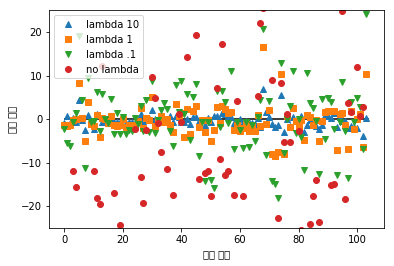

In [49]:
plt.plot(ridge10.coef_, "^", label = 'lambda 10')
plt.plot(ridge.coef_, "s",label = "lambda 1")
plt.plot(ridge01.coef_, "v",label = "lambda .1")

plt.plot(lr.coef_,"o",label = "no lambda")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

데이터 양이 충분히 많아질 경우, Reg 값 없는 LinearRegression과 Ridge의 성능이 거의 같아진다.

# Lasso Regularization (L1 Reg)


In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("train acc : {}".format(lasso.score(X_train, y_train)))
print("test acc : {}".format(lasso.score(X_test, y_test)))
print("feature used : {}".format(np.sum(lasso.coef_ != 0)))
# 의미있는 변수 4개만 추출해 회귀분석을 진행한 결과 acc 낮음

train acc : 0.29323768991114596
test acc : 0.20937503255272272
feature used : 4


In [59]:
# underfit을 줄이기 위해 lambda 값을 수정해야 하는데, 이 경우 max_iter를 설정해줘야 한다고 함.
# coordinate descent로 최적값을 찾아가기 때문에, lambda 값이 낮으면 iter를 늘려줘야 한다.
lasso001 = Lasso(.01, 100000).fit(X_train, y_train)
print("train acc : {}".format(lasso001.score(X_train, y_train)))
print("test acc : {}".format(lasso001.score(X_test, y_test)))
print("feature used : {}".format(np.sum(lasso001.coef_ != 0)))


train acc : 0.8961122320864716
test acc : 0.7677995670886713
feature used : 32


/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [60]:
# lambda 값이 너무 낮으면 LinearRegression과 별 차이 없어진다.
lasso00001 = Lasso(.0001, 100000).fit(X_train, y_train)
print("train acc : {}".format(lasso00001.score(X_train, y_train)))
print("test acc : {}".format(lasso00001.score(X_test, y_test)))
print("feature used : {}".format(np.sum(lasso00001.coef_ != 0)))


train acc : 0.9420931515237063
test acc : 0.6976541391663627
feature used : 100


/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


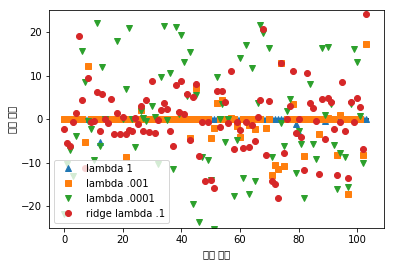

In [63]:
plt.plot(lasso.coef_, "^", label = 'lambda 1')
plt.plot(lasso001.coef_, "s",label = "lambda .001")
plt.plot(lasso00001.coef_, "v",label = "lambda .0001")

plt.plot(ridge01.coef_,"o",label = "ridge lambda .1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

보통은 ridge를 선호한다. 하지만 특성이 많은데 그 중 일부만 사용하려면 lasso가 나은 선택일 수 있다.

분석하기 쉬운 모델은 lasso.

ElasticNet은 L1, L2 둘 다 적용함. sklearn에서 제공.

# Classification
## Binary classification. 

가장 많이 알려진 건 logistic, Linear Support vector machine.

로지스틱은 binary일 경우 logistic loss 함수를, multiclassification의 경우 cross entropy loss를 쓴다고 함.

SVC의 경우 hinge loss를 쓴다.

두 모델은 기본적으로 L2 Reg를 사용한다.

/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


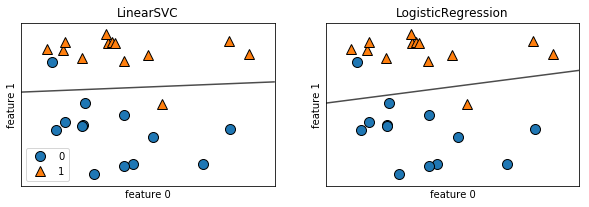

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps =.5, ax = ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

Regularization의 정도를 결정하는 매개변수 C.

C의 값이 클수록 Reg 정도가 감소한다. 즉 값이 클수록 train set에 overfit. 작을수록 underfit.

### Cancer Data로 분류 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [75]:
logreg = LogisticRegression().fit(X_train, y_train)
print("train set acc : {}".format(logreg.score(X_train, y_train)))
print("test set acc : {}".format(logreg.score(X_test, y_test)))

train set acc : 0.9530516431924883
test set acc : 0.958041958041958


/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
# train과 test가 비슷하면 underfit을 의심해봐야 한다. underfit을 해소하기 위해 C값을 키우면
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("train set acc : {}".format(logreg100.score(X_train, y_train)))
print("test set acc : {}".format(logreg100.score(X_test, y_test)))

train set acc : 0.971830985915493
test set acc : 0.965034965034965


/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
logreg001 = LogisticRegression(C=.01).fit(X_train, y_train)
print("train set acc : {}".format(logreg001.score(X_train, y_train)))
print("test set acc : {}".format(logreg001.score(X_test, y_test)))
# underfit이 더 심해진다.

train set acc : 0.9342723004694836
test set acc : 0.9300699300699301


/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


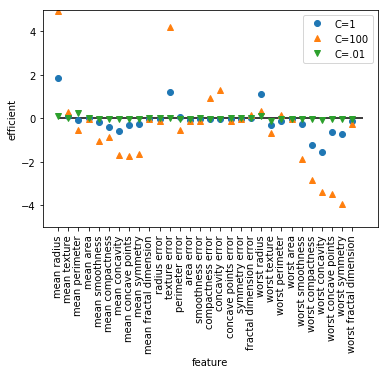

In [83]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T,'^', label = "C=100")
plt.plot(logreg001.coef_.T,"v", label="C=.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("efficient")
plt.legend()

기본적으로 L2 규제를 쓰기 때문에 ridge 결과와 비슷하게 나타난다. reg이 강할수록 계수가 0에 가깝지만, 완전히 0이 되지는 않음.

세 번째 변수 mean perimeter를 보면, C=100일 때 음수, C=1일 때 음수지만 C = 0.01일 때는 양수값이 되며 절대값은 c=1일 때보다 크다. 이런 coef은 해석에 유의해야 함. 

예컨대 texture error 특성은 악성 샘플과 관련이 깊은 편이다. 

하지만 mean perimeter는 부호가 바뀌는 걸로 보아 높은 perimeter값은 양성 / 악성 신호 둘 다에 해당할 수 있다. 이래서 선형 모델의 계수는 해석에 유의해야 한다.

L1 Reg을 쓰려면

LogisticRegression(C=100, penalty="l1").fit(X_train, y_train)

## multiclassification

로지스틱은 softmax가 multiclassification을 지원함. 보통 one vs rest인 모델을 여러 개 만들어서 해결한다.

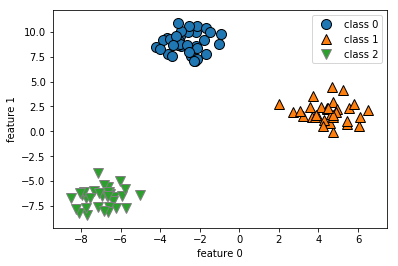

In [84]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2'])

In [86]:
# LinearSVC 사용
linear_svm = LinearSVC().fit(X, y)
print("coefficient : {}".format(linear_svm.coef_.shape))
print("intercept: {}".format(linear_svm.intercept_.shape))
# 3은 class별로 대응하는 계수 벡터
# 2는 feature(columns)에 따른 계수 값

# 즉, 각 row마다 colums이 두 개 있고 그 값이 있다. 
# 해당 값이 각각 class에 어느 정도 부합하는지 weight가 필요한데 그게 coef_의 (3,2)에서 3에 해당

coefficient : (3, 2)
intercept: (3,)
